### Table of Contents
 - Importing libraries
 - Loading datasets
 - Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [5]:
data = pd.read_csv('/users/johnstonkirimo/Projects/weekly_analysis/Week6/data/pa_philadelphia_2020_04_01.csv', low_memory = False)
data.head()

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,1:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,1:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,3:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,3:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,8:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


In [6]:
#How many rows and columns in dataset?

data.shape

(1048575, 22)

In [10]:
#Check summary statistis --  perhaps not very helpful, except for subject_age

data.describe()

,lat,lng,district,subject_age
count,961403.000000,961403.000000,1.048574e+06,1.045523e+06
mean,39.989229,-75.158797,1.847352e+01,3.473804e+01
std,0.043822,0.054935,1.053904e+01,1.339737e+01
min,39.875032,-75.275694,1.000000e+00,1.000000e+01
25%,39.956289,-75.194087,1.200000e+01,2.400000e+01
50%,39.990849,-75.159716,1.800000e+01,3.100000e+01
75%,40.023218,-75.129288,2.400000e+01,4.400000e+01
max,40.137445,-74.957707,7.700000e+01,1.100000e+02


In [186]:
#check columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
raw_row_number               1048575 non-null object
date                         1048575 non-null object
time                         1048575 non-null object
location                     1020308 non-null object
lat                          961403 non-null float64
lng                          961403 non-null float64
district                     1048574 non-null float64
service_area                 1048572 non-null object
subject_age                  1045523 non-null float64
subject_race                 1048575 non-null object
subject_sex                  1048228 non-null object
type                         1048575 non-null object
arrest_made                  1048575 non-null bool
outcome                      58113 non-null object
contraband_found             60056 non-null object
frisk_performed              1048575 non-null bool
search_conducted             1048575 non-null

In [187]:
#What date range does our data cover?

data.groupby('date').size()

date
2014-01-01      51
2014-01-02     115
2014-01-03      26
2014-01-04      32
2014-01-05      56
              ... 
2016-03-28    1148
2016-03-29    1410
2016-03-30    1497
2016-03-31    1951
2016-04-01    1390
Length: 822, dtype: int64

In [188]:
# Another method to check the max and min dates

max_date = data.date.max()
min_date = data.date.min()

print(max_date)
print(min_date)

2016-04-01
2014-01-01


In [189]:
#check for duplicated rows - keep last

dupes = data[data.duplicated(keep = 'last')]
dupes.shape

(0, 22)

In [191]:
#proportion of stops by race

data.groupby('subject_race').size().reset_index(name='count')

,subject_race,count
0,asian/pacific islander,22748
1,black,688504
2,hispanic,102708
3,other,3215
4,unknown,6585
5,white,224815


In [204]:
#Another way to get proportion of stops by race

stops_by_race = data['subject_race'].value_counts(dropna=False)
print(stops_by_race)

black                     688504
white                     224815
hispanic                  102708
asian/pacific islander     22748
unknown                     6585
other                       3215
Name: subject_race, dtype: int64


In [193]:
#proportion of stops by race in percentage

data['subject_race'].value_counts(normalize=True, dropna=False)

black                     0.656609
white                     0.214400
hispanic                  0.097950
asian/pacific islander    0.021694
unknown                   0.006280
other                     0.003066
Name: subject_race, dtype: float64

In [194]:
#check stops where subject_race is 'unknown'

data[data.subject_race == 'unknown'].head()

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
494,359606,2014-01-09,17:45:00,3600 BLOCK N 21ST ST,40.010043,-75.162721,39.0,392,36.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
742,235253,2014-01-12,1:26:00,N 64TH ST / JEFFERSON ST,39.977978,-75.248337,19.0,191,NaN,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
1138,373963,2014-01-15,20:15:00,N 17TH ST / W WESTMORELAND ST,40.003809,-75.157367,39.0,392,47.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
1493,256275,2014-01-18,17:00:00,N GRATZ ST / W YORK ST,39.990330,-75.162956,22.0,221,44.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
1586,156487,2014-01-18,21:15:00,6300 BLOCK REEDLAND ST,39.924429,-75.228209,12.0,123,19.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False


In [195]:
# add year and month columns

data['year'] = data['date'].str[:4]
data['month'] = data['date'].str[5:7]
data.head(3)

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband,year,month
0,411981,2014-01-01,1:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,False,True,True,False,Black - Non-Latino,True,False,2014,01
1,407442,2014-01-01,1:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,False,True,True,True,False,Black - Non-Latino,False,False,2014,01
2,217556,2014-01-01,3:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.19268,18.0,183,24.0,black,...,NaN,False,False,False,False,Black - Non-Latino,False,False,2014,01


In [196]:
#proportion of stops by row_race in percent

data['raw_race'].value_counts(normalize=True, dropna=False)

Black - Non-Latino    0.656609
White - Non-Latino    0.214400
White - Latino        0.086000
Asian                 0.021694
Black - Latino        0.011951
Unknown               0.006280
American Indian       0.003066
Name: raw_race, dtype: float64

In [201]:
#stops by year and raw_race?

year_and_race = data.groupby(['subject_race','year']).year.count().reset_index(name='count')
year_and_race

,subject_race,year,count
0,asian/pacific islander,2014,9292
1,asian/pacific islander,2015,10976
2,asian/pacific islander,2016,2480
3,black,2014,271687
4,black,2015,337801
5,black,2016,79016
6,hispanic,2014,41160
7,hispanic,2015,49258
8,hispanic,2016,12290
9,other,2014,1410


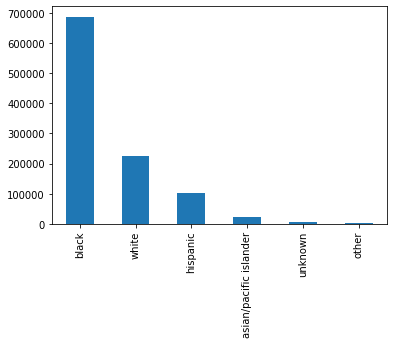

In [198]:
#plotting stops by race

data['subject_race'].value_counts().plot(kind = 'bar')

In [158]:
data.to_csv('state_patrol_clean.csv')

In [209]:
#Map each subject_race by its total population size

population_by_race = {'asian/pacific islander':[110864],
                'black':[648846] ,'hispanic':[221777],
                'other/unknown':[39858], 
                'white':[548312]
              }

for key, value in pop_by_race.items():
    print(key,value)

0 asian/pacific islander    110864
black                     648846
hispanic                  221777
other/unknown              39858
white                     548312
Name: 0, dtype: int64


In [292]:
#convert the dictionary to dataframe

pop_df = pd.DataFrame.from_dict(population_by_race, orient='index').rename(columns={0:'population_size'})
pop_df.index.names = ['subject_race']
pop_df

,population_size
subject_race,
asian/pacific islander,110864
black,648846
hispanic,221777
other/unknown,39858
white,548312


In [291]:
stops_df = stops_by_race.to_frame().reset_index()
stops_df = stops_df.rename(columns= {0:'num_stops'})
stops_df = stops_df.rename(columns= {0: 'list'})
stops_df.index.name = 'index'
stops_df.columns=['subject_race','num_stops']
stops_df

,subject_race,num_stops
index,,
0,black,688504
1,white,224815
2,hispanic,102708
3,asian/pacific islander,22748
4,unknown,6585
5,other,3215


In [305]:
total = stops_df.iloc[4:5].sum().reset_index(name='unknown/other')

In [306]:
total

,index,unknown/other
0,subject_race,unknown
1,num_stops,6585


In [257]:
df

,index,subject_race
0,black,688504
1,white,224815
2,hispanic,102708
3,asian/pacific islander,22748
4,unknown,6585
5,other,3215


In [258]:
df.columns

Index(['index', 'subject_race'], dtype='object')

,subject_race,population_size
index,,
0,black,688504
1,white,224815
2,hispanic,102708
3,asian/pacific islander,22748
4,unknown,6585
5,other,3215


In [ ]:
pd.DataFrame.from_dict(data)

#### Next steps
 - calculate the proportion of residents (stops) by their population size (i.e. get stop rates)
 - plot stop rates
 - look at other useful variables to analyze